In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_name = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']
iris_df = pd.DataFrame(iris.data, columns=feature_name)
iris_df['target'] = iris.target

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
labels=dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=labels

print(iris_df.groupby('target').dbscan_cluster.value_counts())

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


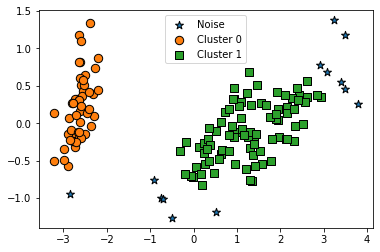

In [4]:
from sklearn.decomposition import PCA
from util import visualize_cluster_plot

pca = PCA(n_components=2)
pca_ts = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_ts[:,0]
iris_df['ftr2'] = pca_ts[:,1]

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

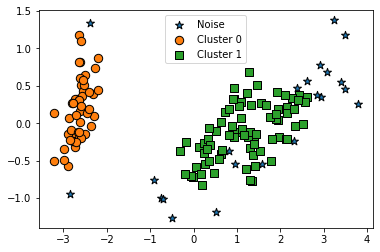

In [5]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
labels=dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=labels
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)


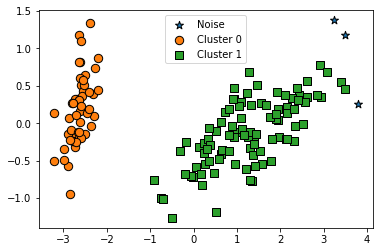

In [6]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
labels=dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=labels
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)



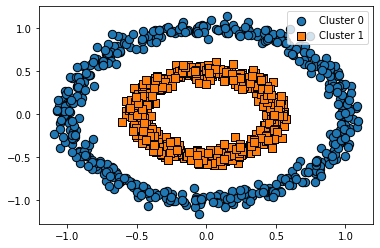

In [9]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

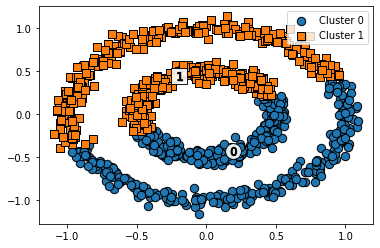

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=1000)
cluster_df['km_label'] = km.fit_predict(X)
visualize_cluster_plot(km, cluster_df, 'km_label', iscenter=True)

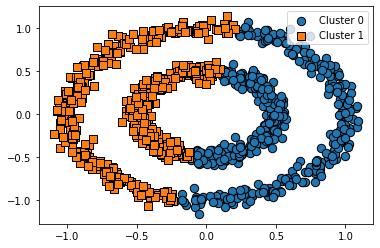

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
cluster_df['gmm_label'] = gmm.fit_predict(X)
visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False)

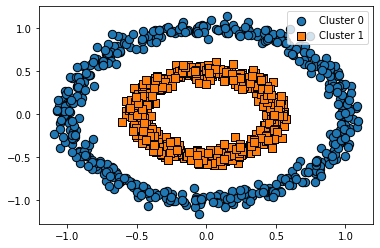

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
cluster_df['dbs_cluster'] = dbscan.fit_predict(X)
visualize_cluster_plot(dbscan, cluster_df, 'dbs_cluster', iscenter=False)